<a href="https://colab.research.google.com/github/Maso-Omwega/Maso-Omwega/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model,metrics
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

Upload and prepare a dataset description file

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving modified_data.csv to modified_data.csv


In [ ]:
dataset = pd.read_csv("modified_data.csv")

In [ ]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [ ]:
dataset.shape

(1460, 77)

*Fill in Missing Values*

In [ ]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [ ]:
dataset.duplicated().any()

False

In [ ]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())

In [ ]:
dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

*Encode the dataset*

In [ ]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [ ]:
cdata=dataset.select_dtypes(include=['object']).copy()
cdata.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
cfeatures=list(cdata.columns)
cfeatures

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal=list(set(cfeatures)-set(nominal))
original_features=list(dataset.columns)
numerical=list(set(original_features)-set(cfeatures))
target=['SalePrice']

In [ ]:
dataset[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
for feature in ordinal:
  dataset[feature]=(dataset[feature].astype('category')).cat.codes
  df_nominal=pd.get_dummies(dataset[nominal])
  df_ordinal=dataset[ordinal]
  df_numerical=dataset[numerical]
  encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)
 

In [ ]:
encoded_data.head(2)

,GarageArea,MasVnrArea,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,EnclosedPorch,PoolArea,BsmtHalfBath,2ndFlrSF,...,Exterior1st,Exterior2nd,GarageFinish,CentralAir,BsmtFinType2,LandSlope,Street,Utilities,LotShape,BsmtQual
0,548,196.0,7,1710,856,2003,0,0,0,854,...,12,13,1,1,5,0,1,0,3,2
1,460,0.0,6,1262,1262,1976,0,0,1,0,...,8,8,1,1,5,0,1,0,3,2


Standardize the dataset

In [ ]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X=encoded_data.drop('SalePrice',axis=1)
y=dataset[target]
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
X.shape

(1460, 111)

In [ ]:
y.shape

(1460, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)

In [ ]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [ ]:
X

array([[ 0.35100032,  0.51001534,  0.65147924, ..., -0.02618016,
         0.75073056, -0.17911454],
       [-0.06073101, -0.57283458, -0.07183611, ..., -0.02618016,
         0.75073056, -0.17911454],
       [ 0.63172623,  0.32217403,  0.65147924, ..., -0.02618016,
        -1.37893255, -0.17911454],
       ...,
       [-1.03391416, -0.57283458,  0.65147924, ..., -0.02618016,
         0.75073056,  0.82282886],
       [-1.09005935, -0.57283458, -0.79515147, ..., -0.02618016,
         0.75073056,  0.82282886],
       [-0.9216238 , -0.57283458, -0.79515147, ..., -0.02618016,
         0.75073056,  0.82282886]])

In [ ]:
print(np.any(np.isnan(X)))

True


In [ ]:
x = np.nan_to_num(X)
print(x)

[[ 0.35100032  0.51001534  0.65147924 ... -0.02618016  0.75073056
  -0.17911454]
 [-0.06073101 -0.57283458 -0.07183611 ... -0.02618016  0.75073056
  -0.17911454]
 [ 0.63172623  0.32217403  0.65147924 ... -0.02618016 -1.37893255
  -0.17911454]
 ...
 [-1.03391416 -0.57283458  0.65147924 ... -0.02618016  0.75073056
   0.82282886]
 [-1.09005935 -0.57283458 -0.79515147 ... -0.02618016  0.75073056
   0.82282886]
 [-0.9216238  -0.57283458 -0.79515147 ... -0.02618016  0.75073056
   0.82282886]]


Feature extraction using PCA

In [ ]:
pca=PCA(n_components=2)
p_components=pca.fit_transform(x)

In [ ]:
p_components

array([[ 2.23758117, -1.70596783],
       [ 0.51830678,  2.41148694],
       [ 2.97746309, -0.94863715],
       ...,
       [ 1.41083666, -0.22553375],
       [-2.93750412,  2.66514717],
       [-1.09822008,  2.0208647 ]])

In [ ]:
pca.explained_variance_ratio_

array([0.09910724, 0.04289167])

In [ ]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.237581,-1.705968,0.347273
1,0.518307,2.411487,0.007288
2,2.977463,-0.948637,0.536154
3,-0.976652,1.291956,-0.515281
4,5.502074,0.059558,0.869843
...,...,...,...
1455,1.512928,-2.026026,-0.074560
1456,1.406690,3.324648,0.366161
1457,1.410837,-0.225534,1.077611
1458,-2.937504,2.665147,-0.488523


In [ ]:
X=p_components

In [ ]:
X

array([[ 2.23758117, -1.70596783],
       [ 0.51830678,  2.41148694],
       [ 2.97746309, -0.94863715],
       ...,
       [ 1.41083666, -0.22553375],
       [-2.93750412,  2.66514717],
       [-1.09822008,  2.0208647 ]])

In [ ]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [ ]:
regressor=LassoCV()

In [ ]:
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [ ]:
regressor.coef_

array([0.25774806, 0.02923024])

In [ ]:
regressor.intercept_

1.757558589688103e-16

In [ ]:
final_data_array=final_data.to_numpy()

In [ ]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot,Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [ ]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

In [ ]:
w_2

0.029230243224130096

Text(0.5, 0.92, 'Plane of Best Fit')

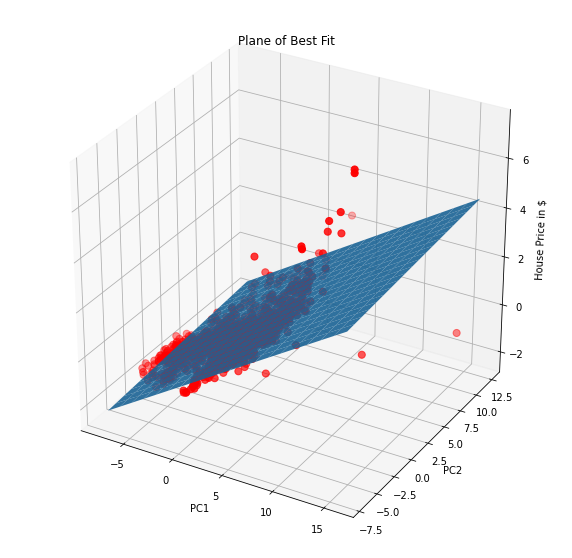

In [ ]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
y_train

array([[-1.04414646],
       [ 0.99576293],
       [-0.85526596],
       ...,
       [ 1.72686898],
       [-0.89304206],
       [ 1.11903894]])

In [ ]:
result = {}
models = {'LinearRegression':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge(),
          'ElasticNet':linear_model.ElasticNet()}

for i in models:
  models[i].fit(X_train,y_train)
  accuracy = models[i].score(X_test,y_test)
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.734839,0.628089,0.734834,0.688906


In [ ]:
kfold = KFold(n_splits=4)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.738038,0.645389,0.73804,0.703274


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid=lasso_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    print("Best Params are ", results.best_params_)
    #accuracy = results.score(X_test,y_test)
    accuracy=results.best_score_
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

Best Params are  {'alpha': 0.02, 'max_iter': 1000, 'tol': 0.001}


,LinearRegression,Lasso,Ridge,ElasticNet
0,0.738038,0.73315,0.73804,0.703274


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    #accuracy = results.score(X_test,y_test)
    accuracy=results.best_score_
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.7347278561793394
Best Params are  {'tol': 1e-06, 'max_iter': 1100, 'alpha': 0.02}


,LinearRegression,Lasso,Ridge,ElasticNet
0,0.738038,0.734728,0.73804,0.703274
